In [1]:
import math
import torch
import matplotlib.pyplot as plt


In [2]:
rwrds = torch.load("max_jump_rwrds.pt")
deltas = torch.load("deltas.pt")

In [3]:
max_deltas = torch.tensor([1, 2, 5, 10, 15, 20, 25, 50, 75, 100])


In [4]:
iterations = torch.arange(rwrds.shape[-1])

## Mean of Rewards over trials

In [5]:
mean_rwrd = rwrds.mean(0)

In [6]:
mean_all = mean_rwrd.mean(-1)

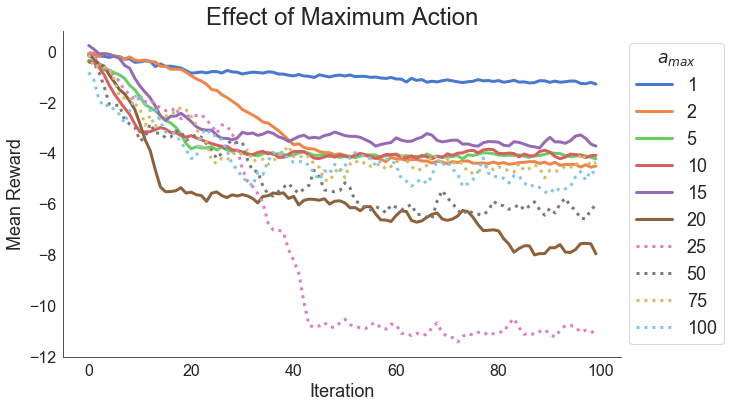

In [15]:
import seaborn as sns
sns.set_style("white")
sns.set_palette("muted")
# plt.rcParams['legend.title_fontsize'] = 'x-large'

ax_fs = 18
leg_fs = 18
tick_fs = 16
title_fs = 24
lwd = 3

plt.figure(figsize=(10, 6))
for ind, mj in enumerate(max_deltas[:6]):
    plt.plot(iterations, mean_rwrd[ind, :],
            label=str(mj.item()), linewidth=lwd)

    
for ind, mj in enumerate(max_deltas[6:]):
    plt.plot(iterations, mean_rwrd[ind+6, :],
            label=str(mj.item()), linestyle=":", linewidth=lwd)

sns.despine()
plt.xlabel("Iteration", fontsize=ax_fs)
plt.ylabel("Mean Reward", fontsize=ax_fs)
plt.tick_params("both", labelsize=tick_fs)
plt.title(r"Effect of Maximum Action", fontsize=title_fs)
plt.legend(loc='center right', bbox_to_anchor=(1.2, 0.5),
          fontsize=leg_fs, title=r'$a_{max}$',
          title_fontsize="xx-large")
plt.savefig("./delta_size.pdf", bbox_inches="tight")
plt.savefig("./delta_size.png", bbox_inches="tight")
plt.show()

In [13]:
tt = 2

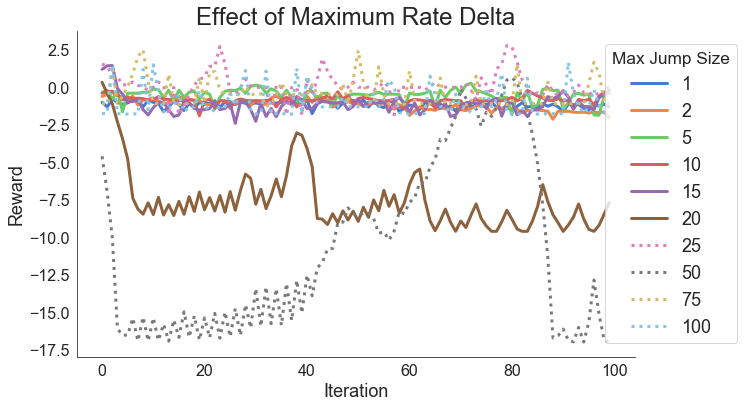

In [14]:
import seaborn as sns
sns.set_style("white")
sns.set_palette("muted")
# plt.rcParams['legend.title_fontsize'] = 'x-large'

ax_fs = 18
leg_fs = 18
tick_fs = 16
title_fs = 24
lwd = 3

plt.figure(figsize=(10, 6))
for ind, mj in enumerate(max_deltas[:6]):
    plt.plot(iterations, rwrds[tt, ind, :],
            label=str(mj.item()), linewidth=lwd)

    
for ind, mj in enumerate(max_deltas[6:]):
    plt.plot(iterations, rwrds[tt, ind+6, :],
            label=str(mj.item()), linestyle=":", linewidth=lwd)

sns.despine()
plt.xlabel("Iteration", fontsize=ax_fs)
plt.ylabel("Reward", fontsize=ax_fs)
plt.tick_params("both", labelsize=tick_fs)
plt.title("Effect of Maximum Rate Delta", fontsize=title_fs)
plt.legend(loc='center right', bbox_to_anchor=(1.2, 0.5),
          fontsize=leg_fs, title="Max Jump Size",
          title_fontsize="xx-large")
plt.show()